# Amath 586 HW 2
Brian de Silva  

##Problem 4(b)

In [105]:
# Implement the midpoint method and import a plotting package

function midpointMethod(f,u₀,T,n)
    # Numerically solves u'(t) = f(u(t)), u(t₀) = u₀ on [t₀,T] so that Uⁿ ≈ u(T=tₙ)
    # Uses Forward Euler to obtain U¹
    
    U = zeros(n+1);
    U[1] = u₀;
    k = 1/n;
    
    # Use one step of FE to get U¹
    U[2] = U[1] + k*f(U[1]);
    
    for j=2:n
        U[j+1] = U[j-1] + 2*k*f(U[j])
    end
    
    return U;
end;

using PyPlot;

First we check that the midpoint method exhibits stability when applied to the test problem for small enough $k$ and determine how small $k$ must be to stabilize the method.

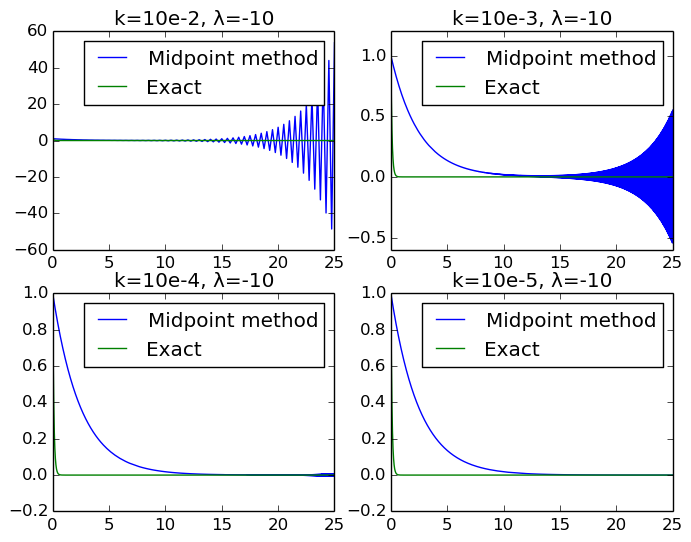

In [106]:
# Set some parameters for the test problem u'(t) = λu(t) ⟹ u(t) = exp(λt)
η = 1;
λ = -10;
T = 25;
f = u -> λ*u;
u₀ = 1;

u_exact = t -> exp(λ*t);
fine_grid = linspace(0,T,100000);

# Apply method for various values of n (= T/k)
U100 = midpointMethod(f,η,T,100);
U1000 = midpointMethod(f,η,T,1000);
U10000 = midpointMethod(f,η,T,10000);
U100000 = midpointMethod(f,η,T,100000);

# Plot the results (analysis below)
PyPlot.figure()
PyPlot.subplot(2,2,1)
PyPlot.plot(linspace(0,T,101),U100,fine_grid,u_exact(fine_grid))
PyPlot.title("k=10e-2, λ=-10")
PyPlot.legend(["Midpoint method","Exact"])

PyPlot.subplot(2,2,2)
PyPlot.plot(linspace(0,T,1001),U1000,fine_grid,u_exact(fine_grid))
PyPlot.title("k=10e-3, λ=-10")
PyPlot.legend(["Midpoint method","Exact"])

PyPlot.subplot(2,2,3)
PyPlot.plot(linspace(0,T,10001),U10000,fine_grid,u_exact(fine_grid))
PyPlot.title("k=10e-4, λ=-10")
PyPlot.legend(["Midpoint method","Exact"])

PyPlot.subplot(2,2,4)
PyPlot.plot(linspace(0,T,100001),U100000,fine_grid,u_exact(fine_grid))
PyPlot.title("k=10e-5, λ=-10")
PyPlot.legend(["Midpoint method","Exact"]);

We see that the method is in fact stable for $k$ small enough. Unfortunately, "small enough'' in this case seems to be on the order of $10^{-4}$ or $10^{-5}$. Even taking $k=10^{-4}$ we still begin to see some oscillaiton in the solution close to $t=10$, suggesting that if we took $T$ to be larger, we would need an even smaller value of $k$ to ensure stability.

##Problem 5

Here we wish to confirm the claim made in Example 7.10, that Euler's method is stable when it is applied to the problem presented in (7.10) exactly when $k\cdot$max$(K_1,K_2)\leq 2$ and is explosively unstable even for $k$ only slightly greater than this bound.

In [107]:
# Euler's method implementation for linear systems
# Solves the problem u' = Au, u(0) = u₀

function eulerSystem(A,u₀,T,n)
# Numerically solves u'(t) = Au(t), u(t₀) = u₀ on [t₀,T] so that Uⁿ ≈ u(T=tₙ)
   
    U = zeros(size(A)[1], n+1);
    U[:,1] = u₀;
    k = T / n;
    
    for j = 1:n
        U[:,j+1] = U[:,j] + k*A*U[:,j];
    end
    
    return U
end;

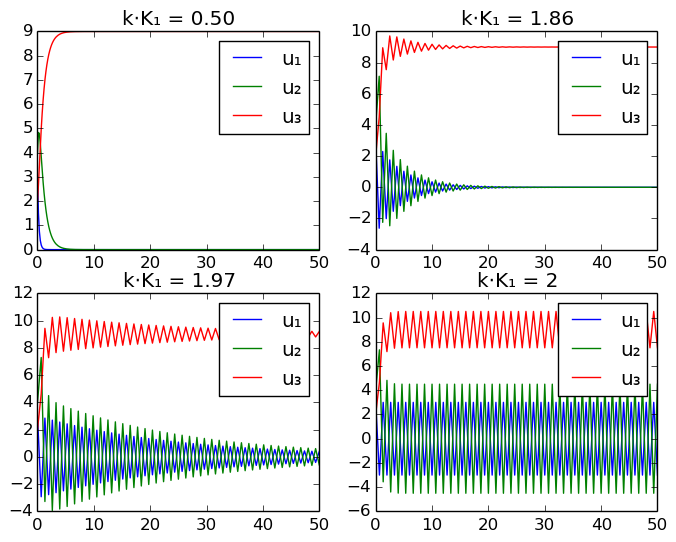

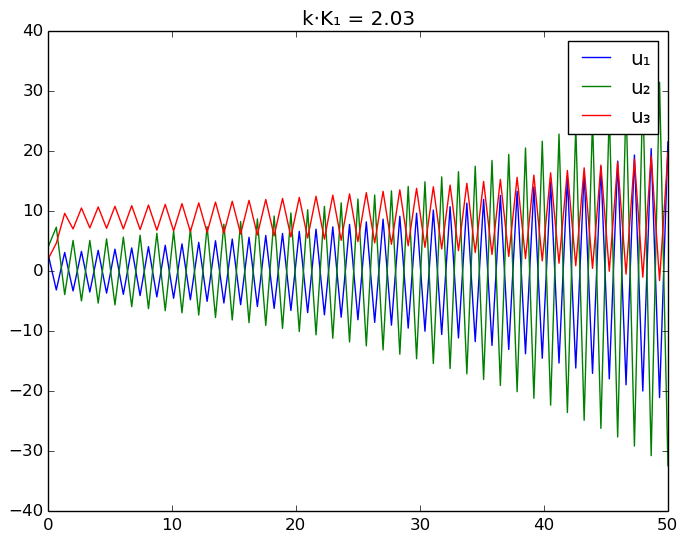

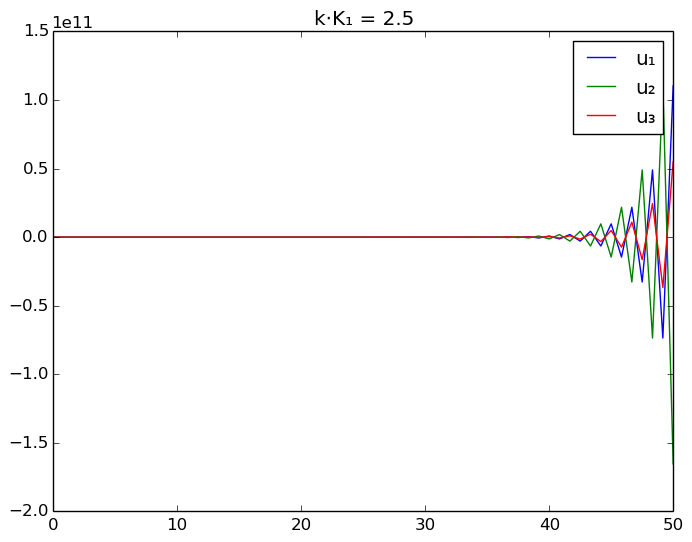

In [148]:
# Define A and choose initial conditions (I went with those from Figure (7.4))
K₁ = 3;
K₂ = 1;
T = 50;

A = [-K₁ 0 0;
    K₁ -K₂ 0;
    0 K₂ 0];

η = [3;4;2];


# Apply Euler's method for various values of k (note: we should witness
# explosive instability as soon as k exceeds 2/3, i.e k⋅K₂ > 2)

# k⋅K₁ = 1/2 < 2
n = 300;
k = T / n;
U300 = eulerSystem(A,η,T,n)
PyPlot.subplot(2,2,1)
PyPlot.plot(linspace(0,T,n+1),U300[1,:]',linspace(0,T,n+1),U300[2,:]',linspace(0,T,n+1),U300[3,:]');
PyPlot.title("k⋅K₁ = 0.50")
PyPlot.legend(["u₁","u₂","u₃"]);

# k⋅K₁ = 1.5 < 2
n = 80;
k = T / n;
U80 = eulerSystem(A,η,T,n)
PyPlot.subplot(2,2,2)
PyPlot.plot(linspace(0,T,n+1),U80[1,:]',linspace(0,T,n+1),U80[2,:]',linspace(0,T,n+1),U80[3,:]');
PyPlot.title("k⋅K₁ = 1.86")
PyPlot.legend(["u₁","u₂","u₃"]);

# k⋅K₁ = 1.97 < 2
n = 76;
k = T / n;
U76 = eulerSystem(A,η,T,n)
PyPlot.subplot(2,2,3)
PyPlot.plot(linspace(0,T,n+1),U76[1,:]',linspace(0,T,n+1),U76[2,:]',linspace(0,T,n+1),U76[3,:]');
PyPlot.title("k⋅K₁ = 1.97")
PyPlot.legend(["u₁","u₂","u₃"]);

# k⋅K₁ = 2
n = 75;
k = T / n;
U75 = eulerSystem(A,η,T,n)
PyPlot.subplot(2,2,4)
PyPlot.plot(linspace(0,T,n+1),U75[1,:]',linspace(0,T,n+1),U75[2,:]',linspace(0,T,n+1),U75[3,:]');
PyPlot.title("k⋅K₁ = 2")
PyPlot.legend(["u₁","u₂","u₃"]);


# k⋅K₁ = 2.03 > 2
n = 74;
k = T / n;
U74 = eulerSystem(A,η,T,n)
PyPlot.figure()
PyPlot.plot(linspace(0,T,n+1),U74[1,:]',linspace(0,T,n+1),U74[2,:]',linspace(0,T,n+1),U74[3,:]');
PyPlot.title("k⋅K₁ = 2.03")
PyPlot.legend(["u₁","u₂","u₃"]);

# k⋅K₁ = 2.5 > 2
n = 60;
k = T / n;
U60 = eulerSystem(A,η,T,n)
PyPlot.figure()
PyPlot.plot(linspace(0,T,n+1),U60[1,:]',linspace(0,T,n+1),U60[2,:]',linspace(0,T,n+1),U60[3,:]');
PyPlot.title("k⋅K₁ = 2.5")
PyPlot.legend(["u₁","u₂","u₃"]);

We see in the plots above that as soon as $k\cdot$max$(K_1,K_2) = k\cdot K_1 > 2$ Euler's method becomes unstable. When the product is $\frac{1}{2}$ it seems to be performing very well. As we increase $k\cdot K_1$, we begin to see some oscillations for smaller time, but these are slowly damped out indicating stability. The oscillations persist longer and longer the more we increase $k\cdot K_1,$ until, finally, when $k\cdot K_1 = 2$ no damping occurs whatsoever. The numerical solutions oscillate regularly about the true solutions without increasing nor decreasing in amplitude at all as time is advanced. We are just on the cusp of instability in this case. As soon as $k\cdot K_1$ is nudged past $2,$ instability begins manifesting itself as the oscillations increase in amplitude with time.